# Exploring Dandiset 001275: Mental Navigation in Primates

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Exercise caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset (001275) contains neurophysiology data collected from two primates during a mental navigation task.
The data is associated with a previously published study (https://doi.org/10.1038/s41586-024-07557-z).
Data from the entorhinal cortex is open-sourced here: https://doi.org/10.48324/dandi.000897/0.240605.1710

Here is a neurosift link for the dandiset: https://neurosift.app/dandiset/001275

## What this notebook will cover

In this notebook, we will load the Dandiset using the DANDI API, explore the available assets,
load data from an example NWB file, and visualize some of the data.

## Required Packages

The following packages are required to run this notebook:

- pynwb
- h5py
- remfile
- numpy
- matplotlib
- seaborn
- pandas

These packages are assumed to be already installed in your environment.


In [1]:
# Load Dandiset using the DANDI API
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 20 assets in the dataset
\nFirst 5 assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Load and explore an NWB file

We will now load one of the NWB files in the Dandiset and explore some of its metadata and data.
We will load the file `sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb`.

The URL for this asset is: https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/

In [2]:
# Load the NWB file
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

print(nwb)
print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x131871588611904
Fields:
  devices: {
    vprobe0 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    vprobe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Neupane, Sujaya']
  file_create_date: [datetime.datetime(2025, 2, 10, 15, 59, 32, 811962, tzinfo=tzoffset(None, -18000))]
  identifier: 15de6847-1f57-4247-847b-af4b179d1b7c
  institution: MIT
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Jazayeri, Fiete
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respon

## Load and visualize eye position data
Now we will load and visualize the eye position data from the NWB file.

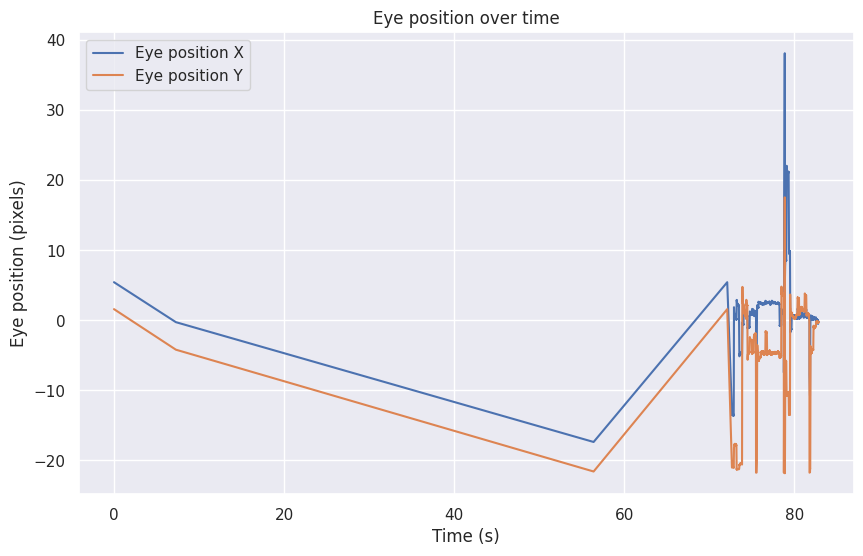

In [3]:
# Load a subset of eye position data and timestamps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
eye_position_data = nwb.processing["behavior"].data_interfaces["eye_position"].data[:10000, :]
eye_position_timestamps = nwb.processing["behavior"].data_interfaces["eye_position"].timestamps[:10000]

# Normalize timestamps
eye_position_timestamps = eye_position_timestamps - eye_position_timestamps[0]

# Plot eye position over time
plt.figure(figsize=(10, 6))
plt.plot(eye_position_timestamps, eye_position_data[:, 0], label="Eye position X")
plt.plot(eye_position_timestamps, eye_position_data[:, 1], label="Eye position Y")
plt.xlabel("Time (s)")
plt.ylabel("Eye position (pixels)")
plt.title("Eye position over time")
plt.legend()
plt.show()

## Load and visualize unit data (spike counts)
Now we will load and visualize the distribution of spike counts across units.

                                          spike_times unit_name       amp  \
id                                                                          
0   [0.0065, 1.2116333333333333, 1.240666666666666...         2  3.378150   
1   [0.22823333333333334, 3.5122666666666666, 4.23...         3  2.290662   
2   [262.66853333333336, 834.9403666666667, 971.70...         9  1.874952   
3   [0.11906666666666667, 0.12373333333333333, 0.2...        11  2.795727   
4   [0.10633333333333334, 0.3126, 0.63833333333333...        12  1.580371   

      ch  ContamPct  original_cluster_id  Amplitude  n_spikes  depth quality  \
id                                                                             
0    2.0       10.2                  2.0       53.4   97283.0    3.0    good   
1    2.0        9.5                  3.0       25.7  168710.0    3.0    good   
2    4.0      100.0                  9.0       24.3      76.0    5.0   noise   
3    5.0        9.8                 11.0       34.9  159662.

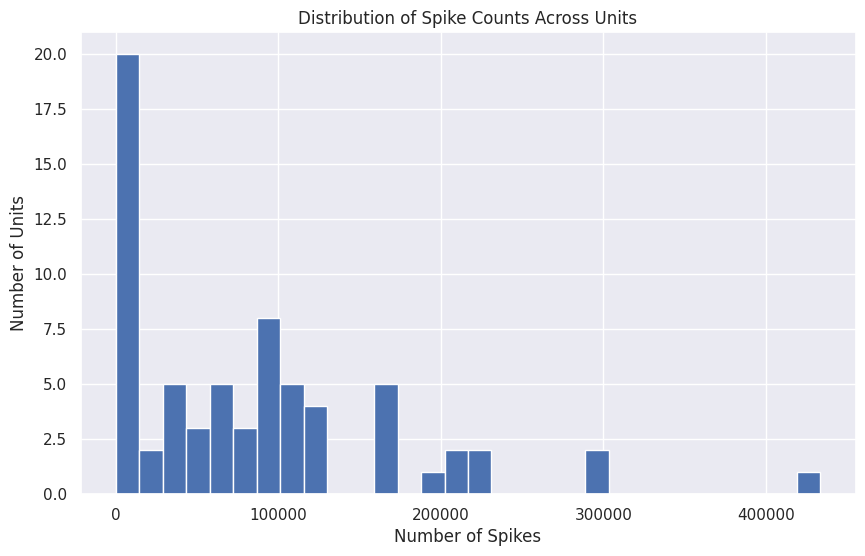

In [4]:
# Access the units data
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme()
units = nwb.processing["ecephys"].data_interfaces["units"]

# Convert units data to a DataFrame
units_df = units.to_dataframe()

# Print the first few rows of the DataFrame
print(units_df.head())

# Plotting the distribution of spike counts for each unit
plt.figure(figsize=(10,6))
plt.hist(units_df['n_spikes'], bins=30)
plt.xlabel('Number of Spikes')
plt.ylabel('Number of Units')
plt.title('Distribution of Spike Counts Across Units')
plt.show()

## Summary and Future Directions

In this notebook, we have demonstrated how to load a DANDI dataset using the DANDI API,
load an NWB file from the dataset, and visualize some example data.

Possible future directions for analysis include:

- Exploring other data modalities in the NWB file, such as LFP data.
- Performing more detailed analysis of the eye position data, such as identifying saccades.
- Analyzing the relationship between neural activity and behavior.